# Analysis of the data gathered in the simulate.py

In [1]:
import numpy as np
import os.path
import sys
sys.path.append('../../libs/neuroneap') #('../../libs/')
sys.path.append('../../mylibs')

import matplotlib.pylab as plt
import matplotlib.colors as colors

import mylibs.plot_supp as pls

%matplotlib inline

# LFP
from eap import field, cell, graph
postfix = '_noAIS_det' #'_noAIS_noNode' # '_noAIS' ''

In [2]:
# params
ext = '.pdf'
plot_lim = [-2,2] #ms,  x_axis from the peak of the somatic spike
save_fig_dir = 'figs/'
save_movie_dir = 'figs/'

axon_color = 'teal'
soma_color = 'darkorange'
NoR_color = 'mediumpurple'

# define colormap 
mycmap = plt.cm.get_cmap('RdYlGn')

## load the data

In [3]:
data = np.load('data/data_hallerman'+postfix+'.npz')

## find the spike and calculate params

In [4]:
# to do
# find the limits for xlims
v_soma = data['v_soma']
v_node = data['v_node']
vecs_ais = data['vecs_ais']
dt = data['dt']
spike_peak = np.argmax(v_soma)*dt

plot_lim = spike_peak+plot_lim
# define timeline
time = np.arange(len(v_soma))*dt
seg_coords = data['seg_coords']


## Dipole calculations

In [5]:
#I_axial = data['I_axial']

#Q = field.calc_dipole_moment(seg_coords, I_axial) # dipole
#Q_len =np.sqrt(np.sum(Q ** 2, 0)) # dipole length

## field potential

In [6]:
'''time_to_plot = 6

# load the data
data_ext = np.load('data/lfp.npz')
print data_ext.keys()
v_ext_raw = data_ext['v_ext_raw']
x_range = data_ext['x_range']
y_range = data_ext['y_range']
yy = data_ext['yy']
xx = data_ext['xx']

# if prestep, subtract from the data
#prestep_time = [30, 40]
#pulse_time = [50, 60]

#prestep_time_pt = (np.array(prestep_time)/dt).astype(int)
#pulse_time_pt = (np.array(pulse_time)/dt).astype(int)
#v_ext = v_ext_raw[pulse_time_pt[0]:pulse_time_pt[1],:,:] - 4*v_ext_raw[prestep_time_pt[0]:prestep_time_pt[1],:,:]
#v_ext+=v_ext_raw[prestep_time_pt[0]-1]
v_ext = v_ext_raw.copy()
print np.shape(v_ext)
t_end = np.size(v_ext,0)*dt
t = np.arange(0, t_end, dt)
time_pt = int(time_to_plot/dt)
'''

"time_to_plot = 6\n\n# load the data\ndata_ext = np.load('data/lfp.npz')\nprint data_ext.keys()\nv_ext_raw = data_ext['v_ext_raw']\nx_range = data_ext['x_range']\ny_range = data_ext['y_range']\nyy = data_ext['yy']\nxx = data_ext['xx']\n\n# if prestep, subtract from the data\n#prestep_time = [30, 40]\n#pulse_time = [50, 60]\n\n#prestep_time_pt = (np.array(prestep_time)/dt).astype(int)\n#pulse_time_pt = (np.array(pulse_time)/dt).astype(int)\n#v_ext = v_ext_raw[pulse_time_pt[0]:pulse_time_pt[1],:,:] - 4*v_ext_raw[prestep_time_pt[0]:prestep_time_pt[1],:,:]\n#v_ext+=v_ext_raw[prestep_time_pt[0]-1]\nv_ext = v_ext_raw.copy()\nprint np.shape(v_ext)\nt_end = np.size(v_ext,0)*dt\nt = np.arange(0, t_end, dt)\ntime_pt = int(time_to_plot/dt)\n"

In [7]:
#v_ext_raw = data_ext['v_ext']
#v_ext_raw[pulse_time_pt[0]:pulse_time_pt[1],10,10]
#print pulse_time_pt[0]
#v_ext = v_ext_raw[pulse_time_pt[0]:pulse_time_pt[1],:,:] - 4*v_ext_raw[prestep_time_pt[0]:prestep_time_pt[1],:,:]
#plt.plot(v_ext_raw[pulse_time_pt[0]:pulse_time_pt[1],10,10])
#plt.plot(v_ext_raw[prestep_time_pt[0]:prestep_time_pt[1],10,10])
#plt.plot(v_ext[:,10,10])
#plt.plot(v_ext_raw[:,10,10])
#print pulse_time_pt
#print prestep_time_pt
#plt.plot(v_ext_raw[pulse_time_pt[0]:pulse_time_pt[1],10,10])

0.005
60.01


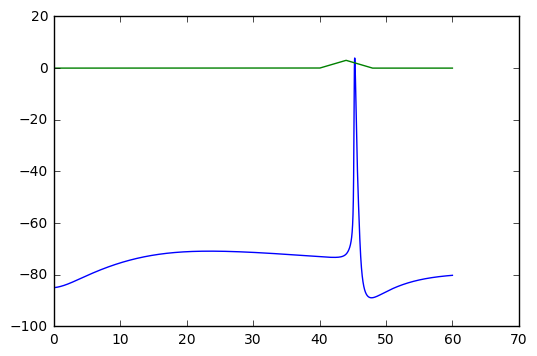

In [8]:
plt.plot(time,v_soma)
plt.plot(time, data['i_stim'])
plt.ylim([-100, 20])
print dt
print len(v_soma)*dt

[  0.00000000e+00   5.00000000e-03   1.00000000e-02 ...,   5.99950000e+01
   6.00000000e+01   6.00050000e+01]


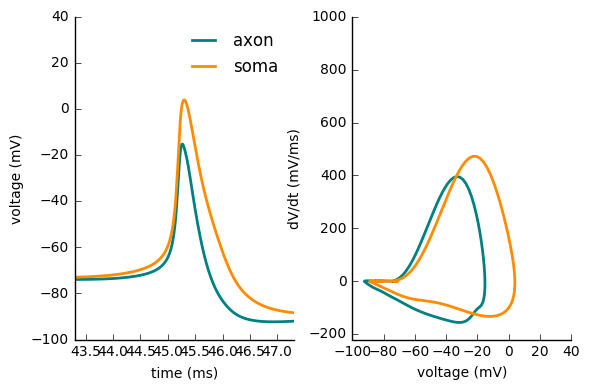

In [9]:
fig_name = 'AP_soma_axon'
ax = plt.subplot(121)

t = np.linspace(0, time[-1]-time[0], len(time))
print t
plt.plot(t, np.array(vecs_ais[-1]),color=axon_color,lw=2, label = 'axon')
plt.plot(t, np.array(v_soma), color = soma_color, lw=2, label = 'soma')
#plt.plot(t, np.array(v_node), color = NoR_color, lw=2, label = 'NoR')

#ax.xaxis.set_ticks(np.arange(55, 57, 0.712123))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
#ax.set_xticklabels([str(0), '20', '40', '60', '80', '>100'])
plt.ylim([-100, 40])
plt.xlim(plot_lim)
plt.ylabel(u'voltage (mV)')
plt.xlabel('time (ms)')
plt.legend(frameon=False)

#pls.clean_plot(ax)
plt.tight_layout()
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# phase plots
ax = plt.subplot(122)
plt.plot(np.array(vecs_ais[-1])[:-1],np.diff(np.array(vecs_ais[-1])/dt), color=axon_color,lw=2, label = 'axon')
plt.plot(np.array(v_soma)[:-1], np.diff(np.array(v_soma)/dt), color = soma_color, lw=2, label = 'soma')
plt.ylim(-220,1000)
plt.xlim(-100, 40)
#plt.plot(np.array(v_node)[:-1], np.diff(np.array(v_node)/dt), color = NoR_color, lw=2, label = 'NoR')
#pls.clean_plot(ax)
plt.tight_layout()
plt.xlabel('voltage (mV)')
plt.ylabel('dV/dt (mV/ms)')
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.savefig('figs/AP_soma_AIS'+postfix+ext)

In [10]:
#axs = graph.plot_multiplies(xx, yy, v_ext, t, sharey=True)
#plt.plot(v_ext[:,:,2])
#print np.shape(v_ext)

In [11]:
# if you want to calculate the v_ext at exact point.. .perhsaps at AIS? and close to the soma
#field.calc_v_ext?

## voltage in the AIS, soma and segments in between

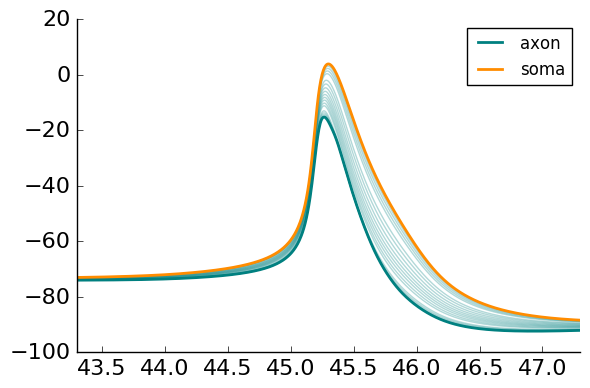

In [12]:
fig_name = 'AP_ais'
ax = plt.subplot(111)

# draw voltage for segments between ais and the soma
vecs_ais = data['vecs_ais']

plt.plot(time, np.array(vecs_ais[-1]),color=axon_color,lw=2, label = 'axon')
for ais_seg in vecs_ais:
    plt.plot(time,np.array(ais_seg), color=axon_color, alpha = 0.3)

plt.plot(time, np.array(v_soma), color = soma_color, lw=2, label = 'soma')
plt.xlim(plot_lim)

plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.legend()

pls.clean_plot(ax)
plt.tight_layout()

plt.savefig('figs/AP_somaToAIS'+postfix+ext)

## AP in the soma, AIS and the current step

## axial current in the cell at the time-pt given

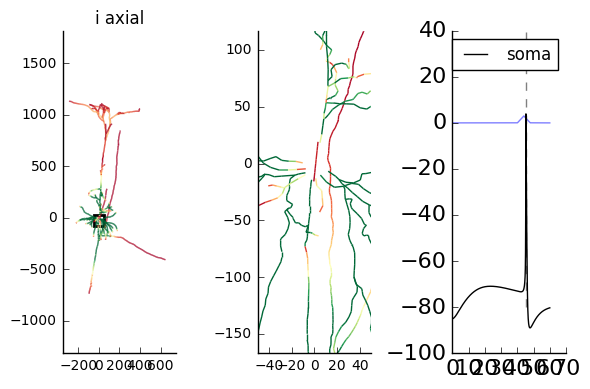

In [13]:
import matplotlib.patches as patches

time_ms = spike_peak # ms
time_pt = int(spike_peak/dt)
fig_name = 'I_axial_at_' + str(time)

# get params
seg_coords = data['seg_coords']
i_stim = data['i_stim']

seg_activation = np.abs(data['I_axial']) / 6.0 + 1.0
seg_activation = np.log(seg_activation)
colors = [mycmap(value) for value in seg_activation]

#plt.plot(seg_activation[50])
# plot morphology of the cell
zoom_x = [-50, 50]
zoom_y = [-80, 30]

# define colorrange
#cbar = plt.colorbar(pcm, extend='both', drawedges=False)


ax1 = plt.subplot(1,3,1)
col = graph.plot_neuron(seg_coords, colors=colors[time_pt], autolim=True)
# add rectangle
#x2 = fig2.add_subplot(111, aspect='equal')
ax1.add_patch(
    patches.Rectangle(
        (zoom_x[0], zoom_y[0]),
        zoom_x[1]-zoom_x[0],
        zoom_y[1]-zoom_y[0],
        fill=False,      # remove background
        lw = 2
    )
)
plt.title('i axial')
plt.tight_layout()

ax2 = plt.subplot(1,3,2)
col = graph.plot_neuron(seg_coords, colors=colors[time_pt], autolim=True)
plt.ylim(zoom_y)
plt.xlim(zoom_x)
plt.tight_layout()

ax3 = plt.subplot(1,3,3)
plt.vlines(time_ms, -80, 40, linestyle='--', color = '0.5')
plt.plot(time, i_stim, color = 'b', alpha = 0.5)
plt.plot(time, v_soma, 'k', label = 'soma')
#plt.xlim([48, 80])

plt.legend()
#plt.colorbar()

#plt.tight_layout()
pls.clean_plot(ax1)
pls.clean_plot(ax2)
pls.clean_plot(ax3)
plt.tight_layout()

plt.savefig('figs/i_axial'+postfix+ext)


## create the movie of axial current and AP

## plot the local field potential 

## create the movie of local field potential

## plot dipole and make a movie

## plot magnetic field and make a movie

## compare magnetic field close to the ais as well as to the other locations

In [14]:
np.shape(I_axial)

NameError: name 'I_axial' is not defined

In [ ]:
print np.shape(seg_activation[50])
plt.plot(seg_activation[50])


In [ ]:
time_at = 44
time_pt = int(time_at /h.dt)
print time_pt
I_at = I[time_pt]
!pwd

In [ ]:
# plot morphology of the cell with the currents during the spike


In [ ]:
import matplotlib.pylab as plt

plt.subplot(1,2,1)
time = np.arange(len(v_soma))*h.dt
plt.plot(time, v_soma, 'r', label = 'soma')
plt.plot(time, v_axon)

In [ ]:
h.dt

In [ ]:
len(v_soma) * h.dt / h.t

In [ ]:
h.dt

In [ ]:
h.dt